## Hierarchical Clustering.

A nice resource for hierarchical clustering can be found here

https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019


Hierarchical clustering is an unsupervised machine learning technique used to group similar data points into clusters. It is a type of clustering algorithm that builds a hierarchy of clusters. Hierarchical clustering is a bottom-up approach, where each data point is initially considered as an individual cluster and then the clusters are merged together based on the similarity measure. The similarity measure can be based on the Euclidean distance, Manhattan distance or other distance measures. Hierarchical clustering can be divided into two types, Agglomerative and Divisive. Agglomerative clustering is a bottom-up approach where each data point is initially considered as its own cluster and then the clusters are merged together based on the similarity measure. Divisive clustering is a top-down approach where all the data points are considered as one big cluster and then that cluster is split into smaller clusters based on the similarity measure.

Lets now look at it in Python


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans 

In [2]:
data = pd.DataFrame(load_iris()['data'], columns = load_iris()['feature_names'])
data['target'] = load_iris()['target']
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


 ### The dendogram
 A dendrogram is a graphical representation of a hierarchical cluster analysis. It is a tree-like diagram that shows how the clusters of data points are related. It is typically used to visualize the output of hierarchical clustering algorithms. The dendrogram shows how the clusters are related to one another, and how the data points are grouped within the clusters. The horizontal axis of the dendrogram represents the distance or similarity between the clusters, and the vertical axis represents the clusters themselves. The dendrogram shows which clusters are closest to each other, and how the data points are grouped within the clusters.
 
 We can create a dendogram from our data

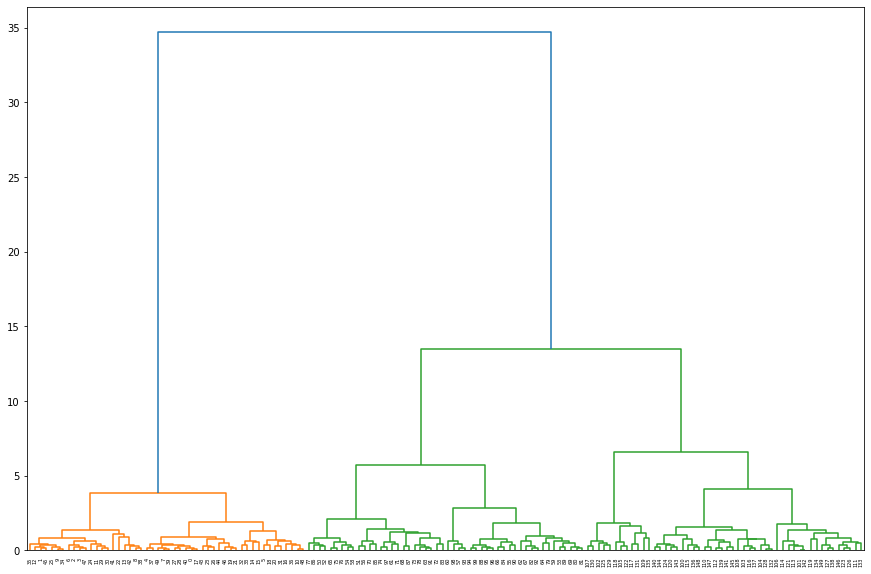

In [3]:
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))
fig = plt.gcf()
fig.set_size_inches(15, 10)

The Denogram can help us decide the best number of clusters. Looking at the dendrogram, the highest vertical distance that doesn’t intersect with any clusters is the middle green one. Given that 3 vertical lines cross the threshold, the optimal number of clusters is 3.

Visit the following for a better explanation of this

If we now want to apply clustering for 3 clusters we can use agglomerative clustering 

In [4]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(data)
labels = model.labels_
data['hierarchical']  =labels

In [5]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,hierarchical
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


Lets compare the results to K-means clustering

In [6]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
data['kmeans'] = kmeans.fit_predict(data.iloc[:, 0:-1])

C:\Users\PeterBaksh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
data.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,hierarchical,kmeans
25,5.0,3.0,1.6,0.2,0,1,1
109,7.2,3.6,6.1,2.5,2,0,2
122,7.7,2.8,6.7,2.0,2,0,2
124,6.7,3.3,5.7,2.1,2,0,2
9,4.9,3.1,1.5,0.1,0,1,1
99,5.7,2.8,4.1,1.3,1,2,0
18,5.7,3.8,1.7,0.3,0,1,1
49,5.0,3.3,1.4,0.2,0,1,1
134,6.1,2.6,5.6,1.4,2,0,2
41,4.5,2.3,1.3,0.3,0,1,1


In [8]:
data.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,hierarchical,kmeans
107,7.3,2.9,6.3,1.8,2,0,2
29,4.7,3.2,1.6,0.2,0,1,1
13,4.3,3.0,1.1,0.1,0,1,1
99,5.7,2.8,4.1,1.3,1,2,0
42,4.4,3.2,1.3,0.2,0,1,1
63,6.1,2.9,4.7,1.4,1,2,0
147,6.5,3.0,5.2,2.0,2,0,2
86,6.7,3.1,4.7,1.5,1,2,0
10,5.4,3.7,1.5,0.2,0,1,1
78,6.0,2.9,4.5,1.5,1,2,0


Note that you may have to alter the mapping of the values of your k means column to align with the mapping for the heriarchical. This is clear where the two algorithms have clustered in a similar way and less clear if they have not 

In [9]:
data['swapped_kmeans'] = data.kmeans.map({2:0, 0:2, 1:1})

print('Clustering agreement : ' , (data.swapped_kmeans == data.hierarchical).sum() / len(data))

Clustering agreement :  0.9933333333333333


Here we see that we get pretty much entire agreemement between the clustering